In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import binomtest,chisquare,ttest_1samp,chi2_contingency,ttest_ind,f_oneway,pearsonr
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest,f_classif,f_regression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.pipeline  import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold


In [2]:
Pipeline1 = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
Pipeline1

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [3]:
Pipeline2 = make_pipeline(KNNImputer(n_neighbors=5),MinMaxScaler())
Pipeline2

,steps,"[('knnimputer', ...), ('minmaxscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [4]:
Pipeline3 = make_pipeline(SimpleImputer(strategy='variance'),RobustScaler(),SelectKBest(score_func=f_regression,k=3))
Pipeline3

,steps,"[('simpleimputer', ...), ('robustscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'variance'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,with_centering,True


In [5]:

Pipeline5 = make_pipeline(SimpleImputer(strategy="mean"),VarianceThreshold(),StandardScaler())
Pipeline5

,steps,"[('simpleimputer', ...), ('variancethreshold', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,threshold,0.0


In [6]:
categories_cols = ['romaric','albert','thomas']
numerical_cols = [1,25,36]


transforsN = Pipeline(steps=[
    ("Data",OneHotEncoder())
])

transformation = ColumnTransformer(transformers=[
    ("CAT",transforsN,categories_cols),
    ("NUM",StandardScaler(),numerical_cols)
])

transformation

,transformers,"[('CAT', ...), ('NUM', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [7]:
transforsN2 = Pipeline(steps=[
    ("encoder",OrdinalEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler())  
])
transformations = ColumnTransformer(transformers=[
    ("CAT",transforsN2,categories_cols),
    ("Num",numerical_transformer,numerical_cols),
])

transformations

,transformers,"[('CAT', ...), ('Num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [8]:
categoriepip3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OneHotEncoder())
])

numeriqueP3 = Pipeline(steps=[
    ("imputer",KNNImputer()),
    ("Outlier",RobustScaler())
])

transformation3 = ColumnTransformer(transformers=[
    ("CAT",categoriepip3,categories_cols),
    ("NUM",numeriqueP3,numerical_cols),
])

pipeline5 = make_pipeline(transformation3,SelectKBest())
pipeline5

,steps,"[('columntransformer', ...), ('selectkbest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT', ...), ('NUM', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
from sklearn.preprocessing import PowerTransformer
categoriepip3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OrdinalEncoder())
])

numeriqueP3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("Outlier",PowerTransformer())
])

transformation3 = ColumnTransformer(transformers=[
    ("CAT",categoriepip3,categories_cols),
    ("NUM",numeriqueP3,numerical_cols),
])

pipeline6 = make_pipeline(transformation3,VarianceThreshold())
pipeline6

,steps,"[('columntransformer', ...), ('variancethreshold', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT', ...), ('NUM', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
from sklearn.preprocessing import PowerTransformer
categoriepip3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OrdinalEncoder()),
    ("selection",SelectKBest(score_func=f_classif,k=5))
])

numeriqueP3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("Outlier",StandardScaler())
])

transformation3 = ColumnTransformer(transformers=[
    ("CAT",categoriepip3,categories_cols),
    ("NUM",numeriqueP3,numerical_cols),
])

transformation3

,transformers,"[('CAT', ...), ('NUM', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [11]:
categoriepip3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OrdinalEncoder()),
    ("selection",SelectKBest(score_func=f_classif,k=5))
])

numeriqueP3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("iqr",SelectKBest()),
    ("Outlier",StandardScaler())
])

transformation3 = ColumnTransformer(transformers=[
    ("CAT",categoriepip3,categories_cols),
    ("NUM",numeriqueP3,numerical_cols),
])

pipline7 = make_pipeline(transformation3,PolynomialFeatures(),RobustScaler())
pipline7

,steps,"[('columntransformer', ...), ('polynomialfeatures', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT', ...), ('NUM', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
categoriepip3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OneHotEncoder())
])

numeriqueP3 = Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("iqr",SelectKBest()),
    ("Outlier",StandardScaler()),
    ("poly",PolynomialFeatures()),
    ("select",SelectKBest())
])

transformation3 = ColumnTransformer(transformers=[
    ("CAT",categoriepip3,categories_cols),
    ("NUM",numeriqueP3,numerical_cols),
])

pipline7 = make_pipeline(transformation3,RobustScaler())
pipline7

,steps,"[('columntransformer', ...), ('robustscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT', ...), ('NUM', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
categories_cols = ['romaric','albert','thomas']
numerical_cols = [1,25,36]
continue_cols = [2.3,25.6,36.2]

niveau5=Pipeline(steps=[
    ("encoder",OneHotEncoder())
])

niveau5_2=Pipeline(steps=[
    ("encoder",OrdinalEncoder())
])

niveau5_3 =Pipeline(steps=[
    ("encoder",StandardScaler())
])

column_transformer2 =ColumnTransformer(transformers=[
    ('CAT_NOM',niveau5,categories_cols),
    ('CAT_ORD',niveau5_2,numerical_cols),
    ('NUM',niveau5_3,continue_cols)
])

pipeline6 = make_pipeline(column_transformer2,SelectKBest())
pipeline6

,steps,"[('columntransformer', ...), ('selectkbest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT_NOM', ...), ('CAT_ORD', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
categories_cols = ['romaric','albert','thomas']
numerical_cols = [1,25,36]
continue_cols = [2.3,25.6,36.2]

niveau5=Pipeline(steps=[
    ("encoder",OneHotEncoder()),
    ("imputer",SimpleImputer())
])

niveau5_2=Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OrdinalEncoder())
])

niveau5_3 =Pipeline(steps=[
    ("imputer",KNNImputer()),
    ("encoder",StandardScaler())
])

column_transformer2 =ColumnTransformer(transformers=[
    ('CAT_NOM',niveau5,categories_cols),
    ('CAT_ORD',niveau5_2,numerical_cols),
    ('NUM',niveau5_3,continue_cols)
])

pipeline6 = make_pipeline(column_transformer2,SelectKBest())
pipeline6

,steps,"[('columntransformer', ...), ('selectkbest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT_NOM', ...), ('CAT_ORD', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
categories_cols = ['romaric','albert','thomas']
numerical_cols = [1,25,36]
continue_cols = [2.3,25.6,36.2]

niveau5=Pipeline(steps=[
    ("encoder",OneHotEncoder()),
    ("imputer",SimpleImputer())
])

niveau5_2=Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OrdinalEncoder()),
    ('selection',SelectKBest())
])

niveau5_3 =Pipeline(steps=[
    ("imputer",KNNImputer()),
    ("encoder",StandardScaler()),
    ("selection",PolynomialFeatures())
])

column_transformer2 =ColumnTransformer(transformers=[
    ('CAT_NOM',niveau5,categories_cols),
    ('CAT_ORD',niveau5_2,numerical_cols),
    ('NUM',niveau5_3,continue_cols)
])

pipeline6 = make_pipeline(column_transformer2,SelectKBest())
pipeline6

,steps,"[('columntransformer', ...), ('selectkbest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT_NOM', ...), ('CAT_ORD', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
categories_cols = ['romaric','albert','thomas']
numerical_cols = [1,25,36]
continue_cols = [2.3,25.6,36.2]

niveau5=Pipeline(steps=[
    ("encoder",OneHotEncoder()),
    ("imputer",SimpleImputer())
])

niveau5_2=Pipeline(steps=[
    ("imputer",SimpleImputer()),
    ("encoder",OrdinalEncoder())
])

niveau5_3 =Pipeline(steps=[
    ("imputer",KNNImputer()),
    ("encoder",StandardScaler())
])

niveau5_4 =Pipeline(steps=[
    ("imputer",KNNImputer()),
    ("encoder",StandardScaler())
])

column_transformer2 =ColumnTransformer(transformers=[
    ('CAT_NOM',niveau5,categories_cols),
    ('CAT_ORD',niveau5_2,numerical_cols),
    ('CAT_BIN',niveau5_3,continue_cols),
    ('NUM',niveau5_4,continue_cols)
    
])

pipeline6 = make_pipeline(column_transformer2,SelectKBest(),PolynomialFeatures(),transformation)
pipeline6

,steps,"[('columntransformer-1', ...), ('selectkbest', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('CAT_NOM', ...), ('CAT_ORD', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split ,cross_val_score,validation_curve,GridSearchCV
from sklearn.metrics import accuracy_score

In [20]:
data = load_breast_cancer()
X = data.data
y = data.target

In [21]:
from sklearn import datasets

# Afficher tous les datasets disponibles dans sklearn
print([dataset for dataset in dir(datasets) if not dataset.startswith("_")])


['clear_data_home', 'data', 'descr', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make_friedman3', 'make_gaussian_quantiles', 'make_hastie_10_2', 'make_low_rank_matrix', 'make_moons', 'make_multilabel_classification', 'make_regression', 'make_s_curve', 'make_sparse_coded_signal', 'make_sparse_spd_matrix', 'make_sparse_uncorrelated', 'make_spd_matrix', 'make_swiss_roll', 'textwrap']


In [24]:
import seaborn as sns

# Afficher tous les datasets disponibles dans Seaborn
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [25]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")



X_train.shape=(455, 30)
X_test.shape=(114, 30)
y_train.shape=(455,)
y_test.shape=(114,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


train_accuracy = accuracy_score(y_train,train_predictions)
test_accuracy = accuracy_score(y_test,test_predictions)



print(f"{train_accuracy=}")
print(f"{test_accuracy=}")

train_accuracy=0.9516483516483516
test_accuracy=0.9210526315789473


# EVALUATION par validation croisee :

In [34]:
model = KNeighborsClassifier(n_neighbors=1)

cv_scores = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,scoring="accuracy")

print(f"scores de vallidations croisee : {cv_scores}")
print(f"moyenne des scores de validations croisee: {cv_scores.mean()}")

scores de vallidations croisee : [0.94505495 0.89010989 0.9010989  0.94505495 0.92307692]
moyenne des scores de validations croisee: 0.9208791208791209


# recherche du meilleurs hyperparametre n_nEIGHBORS

In [36]:
k_scores = {}
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
    k_scores[k] = cv_scores.mean()

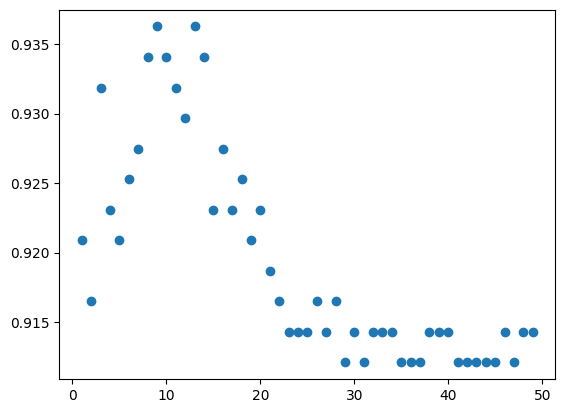

In [37]:
plt.scatter(k_scores.keys(),k_scores.values())

In [41]:
train_scores,validation_scores = validation_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=10,
    param_name='n_neighbors',
    param_range=np.arange(1,50),
    scoring="accuracy"
)

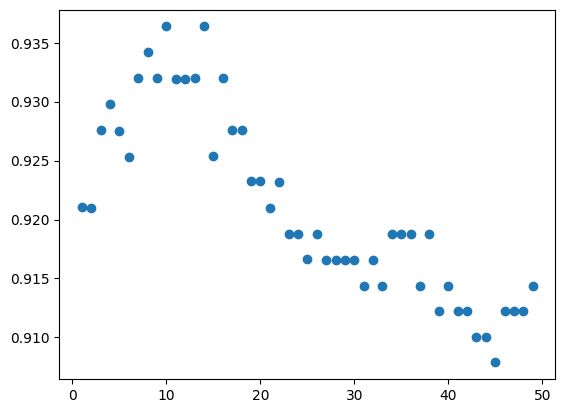

In [42]:
mean_scores= validation_scores.mean(axis=1)

plt.scatter(np.arange(1,50),mean_scores)

In [43]:
param_grid = {
    "n_neighbors":np.arange(1,20),
    "metric":['minkowski','cosine','euclidean']
}


gridSearch = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='accuracy')

gridSearch.fit(X_train,y_train)

,estimator,KNeighborsCla..._neighbors=49)
,param_grid,"{'metric': ['minkowski', 'cosine', ...], 'n_neighbors': array([ 1, 2... 18, 19])}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(9)


In [44]:
gridSearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_metric', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [51]:
gridSearch.fit

<bound method BaseSearchCV.fit of GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=49),
             param_grid={'metric': ['minkowski', 'cosine', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')>

In [46]:
gridSearch.cv_results_['params']

[{'metric': 'minkowski', 'n_neighbors': np.int64(1)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(2)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(3)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(4)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(5)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(6)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(7)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(8)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(9)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(10)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(11)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(12)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(13)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(14)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(15)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(16)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(17)},
 {'metric': 'minkowski', 'n_neighbors': np.int64(18)},
 {'metric': 'minkow

In [47]:
gridSearch.cv_results_['mean_test_score']

array([0.92087912, 0.91648352, 0.93186813, 0.92307692, 0.92087912,
       0.92527473, 0.92747253, 0.93406593, 0.93626374, 0.93406593,
       0.93186813, 0.92967033, 0.93626374, 0.93406593, 0.92307692,
       0.92747253, 0.92307692, 0.92527473, 0.92087912, 0.9010989 ,
       0.9010989 , 0.92087912, 0.91648352, 0.91868132, 0.91648352,
       0.92087912, 0.91868132, 0.92087912, 0.92527473, 0.92087912,
       0.91868132, 0.92527473, 0.92087912, 0.92307692, 0.91868132,
       0.91868132, 0.91428571, 0.91428571, 0.92087912, 0.91648352,
       0.93186813, 0.92307692, 0.92087912, 0.92527473, 0.92747253,
       0.93406593, 0.93626374, 0.93406593, 0.93186813, 0.92967033,
       0.93626374, 0.93406593, 0.92307692, 0.92747253, 0.92307692,
       0.92527473, 0.92087912])

In [48]:
params = gridSearch.cv_results_['params']
scores = gridSearch.cv_results_["mean_test_score"]
gridSearch_results = pd.DataFrame(params)
gridSearch_results['score'] = scores


In [49]:
gridSearch_results

,metric,n_neighbors,score
0,minkowski,1,0.920879
1,minkowski,2,0.916484
2,minkowski,3,0.931868
3,minkowski,4,0.923077
4,minkowski,5,0.920879
5,minkowski,6,0.925275
6,minkowski,7,0.927473
7,minkowski,8,0.934066
8,minkowski,9,0.936264
9,minkowski,10,0.934066


In [53]:
gridSearch_heatmap = gridSearch_results.pivot(index="n_neighbors",columns="metric",values="score")

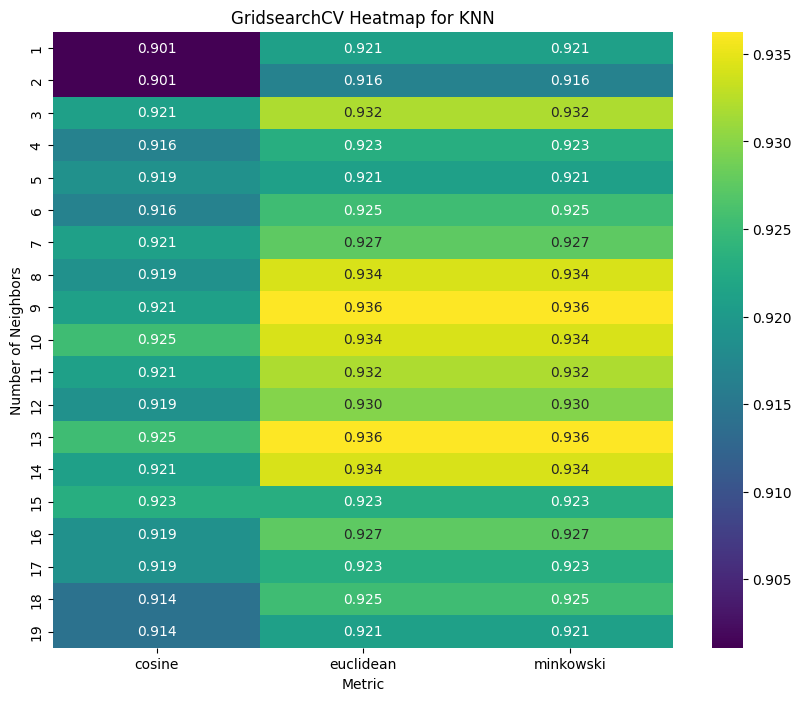

In [54]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(gridSearch_heatmap, annot=True, fmt=".3f", cmap="viridis")
plt.title("GridsearchCV Heatmap for KNN")
plt.xlabel("Metric")
plt.ylabel("Number of Neighbors")
plt.show()


In [56]:
print(f"les meilleurs parametres : {gridSearch.best_params_}")
print(f"meilleur score : {gridSearch.best_estimator_}")


les meilleurs parametres : {'metric': 'minkowski', 'n_neighbors': np.int64(9)}
meilleur score : KNeighborsClassifier(n_neighbors=np.int64(9))


In [57]:
best_model = gridSearch.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy sur le jeu de test : {test_accuracy}")

Accuracy sur le jeu de test : 0.9649122807017544
